# Quick usage examples for PyDisdrometer #
This notebook shows some (very) brief examples of current PyDisdrometer functionality and how to interact with it.

## NASA GV Field Campaign Parsivel Format ##
Let's start with a NASA Ground Validation Parsivel formatted file.

In [26]:
%pylab inline

import pydisdrometer
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [12]:
filename = '/Users/hard505/Dropbox/Projects/NetworkRetrieval/data/Disdrometer/IFloodS_APU01_2013_0502_dsd.txt' #Parsivel 05, March 2nd

In [13]:
dsd = pydisdrometer.read_parsivel_nasa_gv(filename, campaign='ifloods')

So at this point we have the drop size distribution read in. NASA strips out rainfall information though.  Let's do some T-Matrix scattering though. This should take a little bit(up to a minute or so on my laptop depending on the file).

In [14]:
dsd.calculate_radar_parameters()  

This assumes BC shape relationship, X band, 10C. You can pass in a new wavelength to change that.
 Let's plot some of the parameters, and then try to do something with the data.

/Users/hard505/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


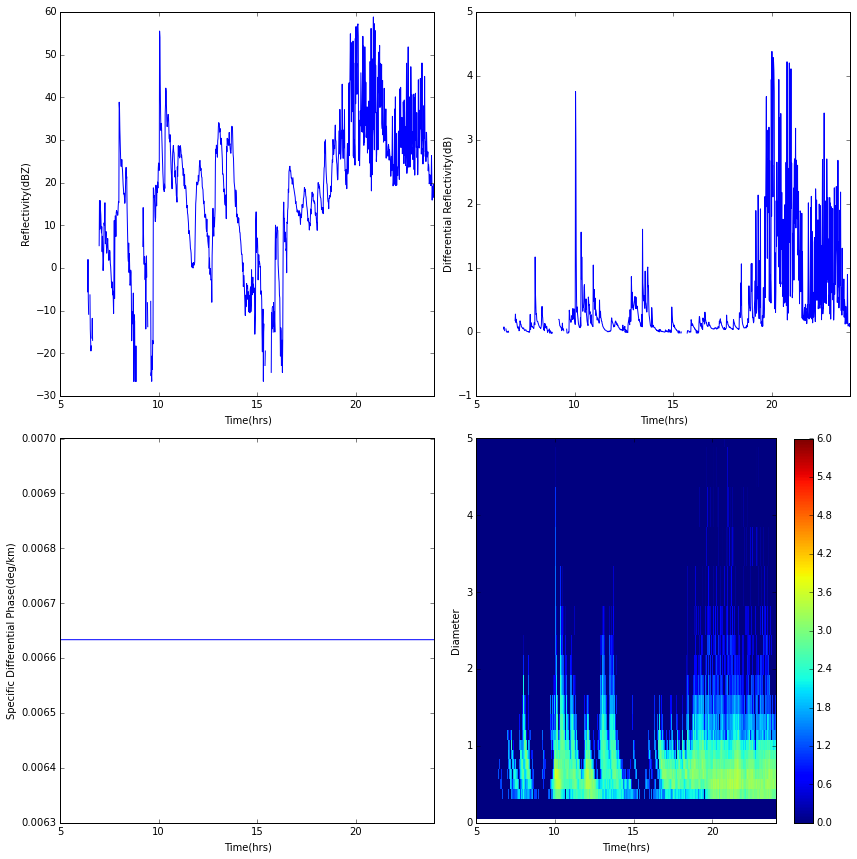

In [15]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.plot(dsd.time/60.0, dsd.fields['Zh']['data'])
plt.xlabel('Time(hrs)')
plt.ylabel('Reflectivity(dBZ)')
plt.xlim(5,24)

plt.subplot(2,2,2)
plt.plot(dsd.time/60.0, dsd.fields['Zdr']['data'])
plt.xlabel('Time(hrs)')
plt.ylabel('Differential Reflectivity(dB)')
plt.xlim(5,24)

plt.subplot(2,2,3)
plt.plot(dsd.time/60.0, dsd.fields['Kdp']['data'])
plt.xlabel('Time(hrs)')
plt.ylabel('Specific Differential Phase(deg/km)')
plt.xlim(5,24)

plt.subplot(2,2,4)
plt.pcolor(dsd.time/60.0, dsd.diameter, np.log10(dsd.Nd.T), vmin=0, vmax=6)
plt.xlabel('Time(hrs)')
plt.ylabel('Diameter')
plt.colorbar()
plt.ylim(0,5) #Zoom in some
plt.xlim(5,24)

plt.tight_layout()

plt.show()

Next let's estimate some microphysical parameterizations.

In [16]:
dsd.calculate_dsd_parameterization()

/Users/hard505/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/Users/hard505/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


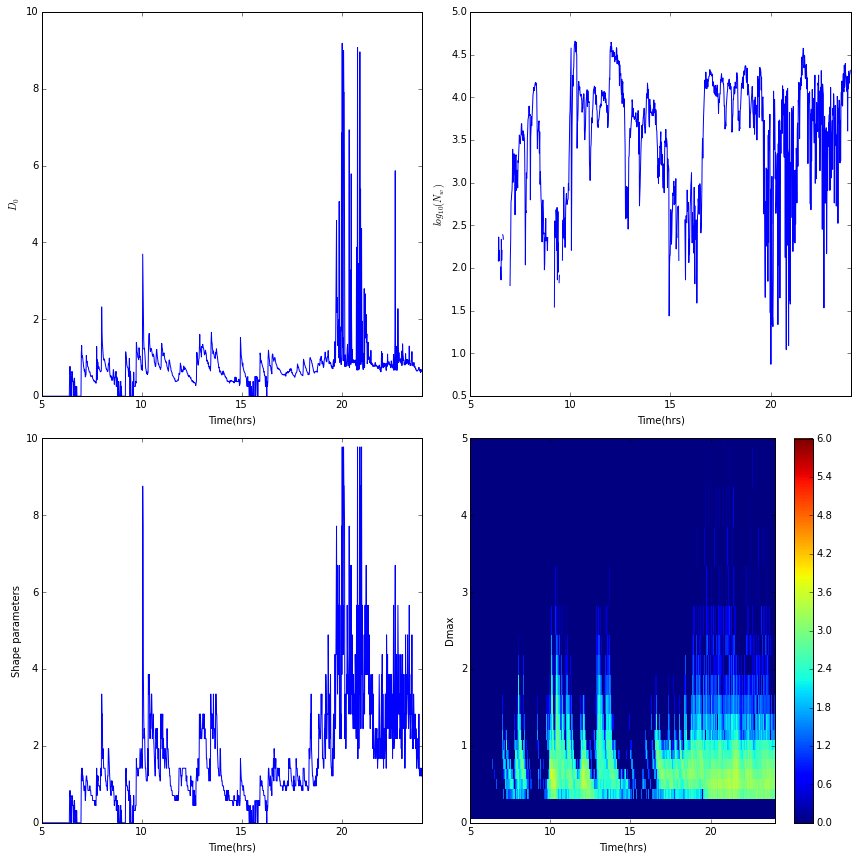

In [22]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.plot(dsd.time/60.0, dsd.fields['D0']['data'])
plt.xlabel('Time(hrs)')
plt.ylabel('$D_0$')
plt.xlim(5,24)

plt.subplot(2,2,2)
plt.plot(dsd.time/60.0, np.log10(dsd.fields['Nw']['data']))
plt.xlabel('Time(hrs)')
plt.ylabel('$log_{10}(N_w)$')
plt.xlim(5,24)

plt.subplot(2,2,3)
plt.plot(dsd.time/60.0, dsd.fields['Dmax']['data'])
plt.xlabel('Time(hrs)')
plt.ylabel('Shape parameters')
plt.xlim(5,24)

plt.subplot(2,2,4)
plt.pcolor(dsd.time/60.0, dsd.diameter, np.log10(dsd.Nd.T), vmin=0, vmax=6)
plt.xlabel('Time(hrs)')
plt.ylabel('Dmax')
plt.colorbar()
plt.ylim(0,5) #Zoom in some
plt.xlim(5,24)

plt.tight_layout()

plt.show()

At hour twenty we see some drops that are probably instrument inaccuracies. Let's look at the overall behavior of the parameters with respect to each other.

/Users/hard505/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


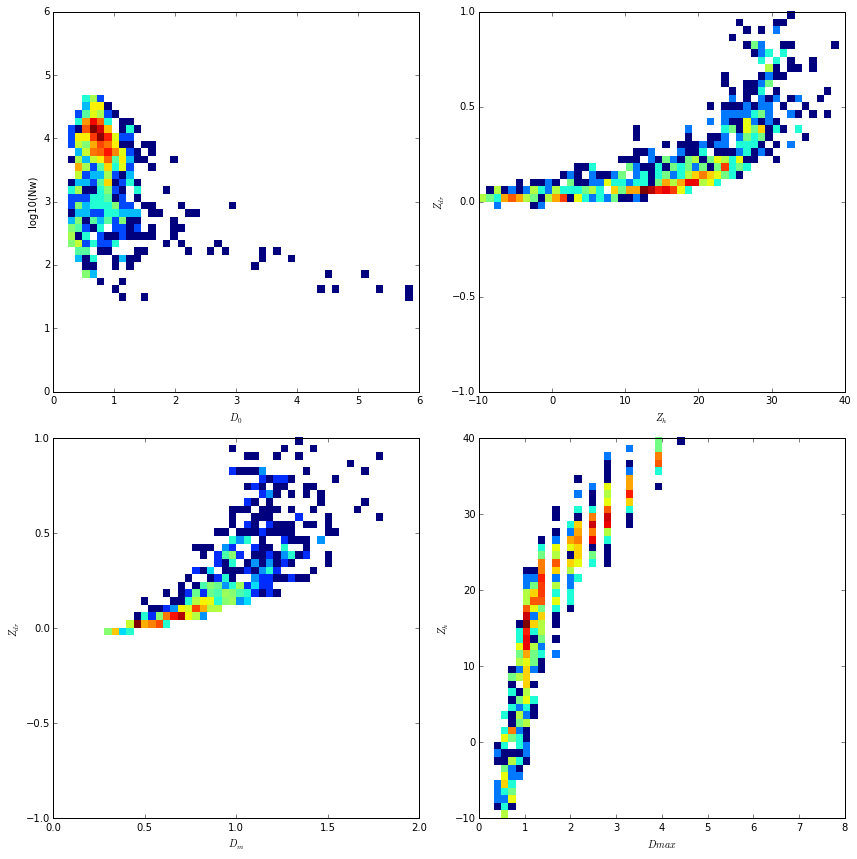

In [68]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.hist2d(dsd.fields['D0']['data'], np.log10(dsd.fields['Nw']['data']), 
           range=((0,6),(0,6)), vmin=1, bins=50, norm=LogNorm())
plt.ylabel('log10(Nw)')
plt.xlabel('$D_0$')

plt.subplot(2,2,2)
plt.hist2d(dsd.fields['Zh']['data'], dsd.fields['Zdr']['data'], 
           range=((-10,40),(-1,1)), vmin=1, bins=50, norm=LogNorm())
plt.xlabel('$Z_h$')
plt.ylabel('$Z_{dr}$')

plt.subplot(2,2,3)
plt.hist2d(dsd.fields['Dm']['data'], dsd.fields['Zdr']['data'],
        range=((0,2),(-1,1)), vmin=1, bins=50, norm=LogNorm())
plt.xlabel('$D_m$')
plt.ylabel('$Z_{dr}$')

plt.subplot(2,2,4)
plt.hist2d(dsd.fields['Dmax']['data'], dsd.fields['Zh']['data'],
        range=((0,8),(-10,40)), vmin=1, bins=50, norm=LogNorm())
plt.ylabel('$Z_h$')
plt.xlabel('$Dmax$')

plt.tight_layout()

plt.show()

Let's take what might be another common use case. Finding areas with certain size drops. In this case everything above 4mm. There are a few ways to do this but let's just create an indicator function for now.

(5, 24)

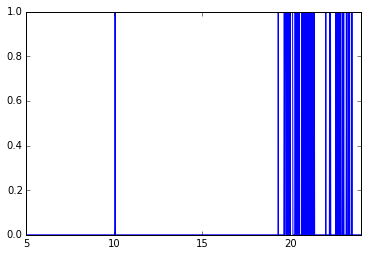

In [19]:
plot(dsd.time/60.0 , 0<sum(dsd.Nd[:,dsd.diameter>4], axis=1))
plt.xlim(5,24)

Or maybe we just want a listing of the time steps where there are drops greater than 4mm

In [20]:
time_hrs = dsd.time/60.0
print(time_hrs[0<sum(dsd.Nd[:,dsd.diameter>4], axis=1)])

[ 10.05        10.06666667  19.31666667  19.65        19.66666667
  19.71666667  19.73333333  19.75        19.76666667  19.8         19.81666667
  19.83333333  19.86666667  19.9         19.98333333  20.01666667
  20.03333333  20.05        20.06666667  20.08333333  20.1         20.11666667
  20.13333333  20.26666667  20.28333333  20.36666667  20.4         20.43333333
  20.46666667  20.51666667  20.66666667  20.73333333  20.78333333
  20.81666667  20.83333333  20.9         20.93333333  20.96666667
  20.98333333  21.01666667  21.11666667  21.15        21.16666667  21.2
  21.21666667  21.25        21.26666667  21.31666667  21.36666667
  22.01666667  22.23333333  22.28333333  22.58333333  22.65        22.66666667
  22.73333333  22.8         22.81666667  22.85        22.95        23.03333333
  23.18333333  23.28333333  23.36666667  23.5       ]
